In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math 

In [3]:
ams = pd.read_csv(r'C:\Programowanie\Jupyter\\data\weather_amsterdam.csv')
bar = pd.read_csv(r'C:\Programowanie\Jupyter\\data\weather_barcelona.csv')
rom = pd.read_csv(r'C:\Programowanie\Jupyter\\data\weather_rome.csv')

In [4]:
ams['City'] = 'Amsterdam'

In [5]:
ams.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City
0,2018-01-01,8,6,1,4,1,Amsterdam
1,2018-01-02,9,4,5,4,1,Amsterdam
2,2018-01-03,11,6,8,4,1,Amsterdam
3,2018-01-04,11,7,1,4,1,Amsterdam
4,2018-01-05,8,5,3,4,1,Amsterdam


In [6]:
len(ams)

90

In [7]:
bar['City'] = 'Barcelona'

In [8]:
bar.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City
0,2018-01-01,17,11,0,13,7,Barcelona
1,2018-01-02,19,8,0,13,7,Barcelona
2,2018-01-03,23,11,0,13,7,Barcelona
3,2018-01-04,24,15,0,13,7,Barcelona
4,2018-01-05,20,10,0,13,7,Barcelona


In [9]:
len(ams)

90

In [10]:
rom['City'] = 'Rome'

In [11]:
rom.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City
0,2018-01-01,14,8,0,12,4,Rome
1,2018-01-02,13,7,0,12,4,Rome
2,2018-01-03,14,1,0,12,4,Rome
3,2018-01-04,16,6,0,12,4,Rome
4,2018-01-05,17,7,0,12,3,Rome


In [12]:
len(ams)

90

In [13]:
all = pd.concat(objs=[ams, bar,rom], ignore_index=True)

Najwyższa maksymalna, najniższa i średnia temp oraz średnie opady dla wszystkich miast, dla każdego miesiąca

In [14]:
all.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City
0,2018-01-01,8,6,1,4,1,Amsterdam
1,2018-01-02,9,4,5,4,1,Amsterdam
2,2018-01-03,11,6,8,4,1,Amsterdam
3,2018-01-04,11,7,1,4,1,Amsterdam
4,2018-01-05,8,5,3,4,1,Amsterdam


In [15]:
all = all.drop(columns = "AvgTempMin")

In [16]:
all = all.drop(columns = "AvgTempMax")

In [17]:
all.head()

,Date,TempMax,TempMin,Rain,City
0,2018-01-01,8,6,1,Amsterdam
1,2018-01-02,9,4,5,Amsterdam
2,2018-01-03,11,6,8,Amsterdam
3,2018-01-04,11,7,1,Amsterdam
4,2018-01-05,8,5,3,Amsterdam


In [18]:
len(all)

270

In [19]:
all.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     270 non-null    object
 1   TempMax  270 non-null    int64 
 2   TempMin  270 non-null    int64 
 3   Rain     270 non-null    object
 4   City     270 non-null    object
dtypes: int64(2), object(3)
memory usage: 52.1 KB


In [20]:
all['Rain'] = all['Rain'].astype('float')

In [21]:
dateSep = all['Date'].str.split('-')

In [22]:
dateSep 

0      [2018, 01, 01]
1      [2018, 01, 02]
2      [2018, 01, 03]
3      [2018, 01, 04]
4      [2018, 01, 05]
            ...      
265    [2018, 03, 27]
266    [2018, 03, 28]
267    [2018, 03, 29]
268    [2018, 03, 30]
269    [2018, 03, 31]
Name: Date, Length: 270, dtype: object

In [23]:
all.head()

,Date,TempMax,TempMin,Rain,City
0,2018-01-01,8,6,1.0,Amsterdam
1,2018-01-02,9,4,5.0,Amsterdam
2,2018-01-03,11,6,8.0,Amsterdam
3,2018-01-04,11,7,1.0,Amsterdam
4,2018-01-05,8,5,3.0,Amsterdam


In [24]:
all['Months'] = all['Date'].str[5:7]

In [25]:
all.head()

,Date,TempMax,TempMin,Rain,City,Months
0,2018-01-01,8,6,1.0,Amsterdam,01
1,2018-01-02,9,4,5.0,Amsterdam,01
2,2018-01-03,11,6,8.0,Amsterdam,01
3,2018-01-04,11,7,1.0,Amsterdam,01
4,2018-01-05,8,5,3.0,Amsterdam,01


In [26]:
maxTemp = all.pivot_table(index=['Months'], values='TempMax', aggfunc='max')

In [27]:
maxTemp

,TempMax
Months,
01,24
02,17
03,21


In [28]:
all['TempMax'].idxmax()

93

In [29]:
all.loc[93]

Date       2018-01-04
TempMax            24
TempMin            15
Rain              0.0
City        Barcelona
Months             01
Name: 93, dtype: object

In [30]:
January = all.where(all['Months'] == "01").dropna()

In [31]:
January

,Date,TempMax,TempMin,Rain,City,Months
0,2018-01-01,8.0,6.0,1.0,Amsterdam,01
1,2018-01-02,9.0,4.0,5.0,Amsterdam,01
2,2018-01-03,11.0,6.0,8.0,Amsterdam,01
3,2018-01-04,11.0,7.0,1.0,Amsterdam,01
4,2018-01-05,8.0,5.0,3.0,Amsterdam,01
...,...,...,...,...,...,...
206,2018-01-27,15.0,7.0,0.0,Rome,01
207,2018-01-28,15.0,4.0,0.0,Rome,01
208,2018-01-29,15.0,3.0,0.0,Rome,01
209,2018-01-30,14.0,3.0,0.0,Rome,01


In [32]:
minTempPT = all.pivot_table(index='Months', values='TempMin', aggfunc='min')

In [33]:
minTempPT

,TempMin
Months,
01,-1
02,-9
03,-9


In [34]:
January['TempMin'].min()

-1.0

In [35]:
January['TempMin'].idxmin()

6

In [36]:
January.loc[6]

Date       2018-01-07
TempMax           4.0
TempMin          -1.0
Rain              0.0
City        Amsterdam
Months             01
Name: 6, dtype: object

In [37]:


all['TempMin'].min()

-9

In [38]:
all['TempMin'].idxmin()

58

In [39]:
all.loc[59]

Date       2018-03-01
TempMax            -1
TempMin            -9
Rain              0.0
City        Amsterdam
Months             03
Name: 59, dtype: object

In [40]:
RainPT = all.pivot_table(index='Months', values='Rain')

In [41]:
RainPT

,Rain
Months,
01,1.096774
02,1.440476
03,0.946237


In [42]:
all.where(all['TempMin'] == -9).dropna()

,Date,TempMax,TempMin,Rain,City,Months
58,2018-02-28,-5.0,-9.0,0.0,Amsterdam,02
59,2018-03-01,-1.0,-9.0,0.0,Amsterdam,03


Wykresy temperatur

In [43]:
temp_max = pd.DataFrame(index=bar.index)

In [44]:
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

In [45]:
temp_max.head()

,Barcelona,Rome,Amsterdam
0,17,14,8
1,19,13,9
2,23,14,11
3,24,16,11
4,20,17,8


In [46]:
temp_max.set_index(bar["Date"], inplace = True)

In [47]:
datelist = [0,7,14,21,28,35,42,49,56,63,70,77,84,89]

In [48]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [49]:
plt.style.use('seaborn-darkgrid')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

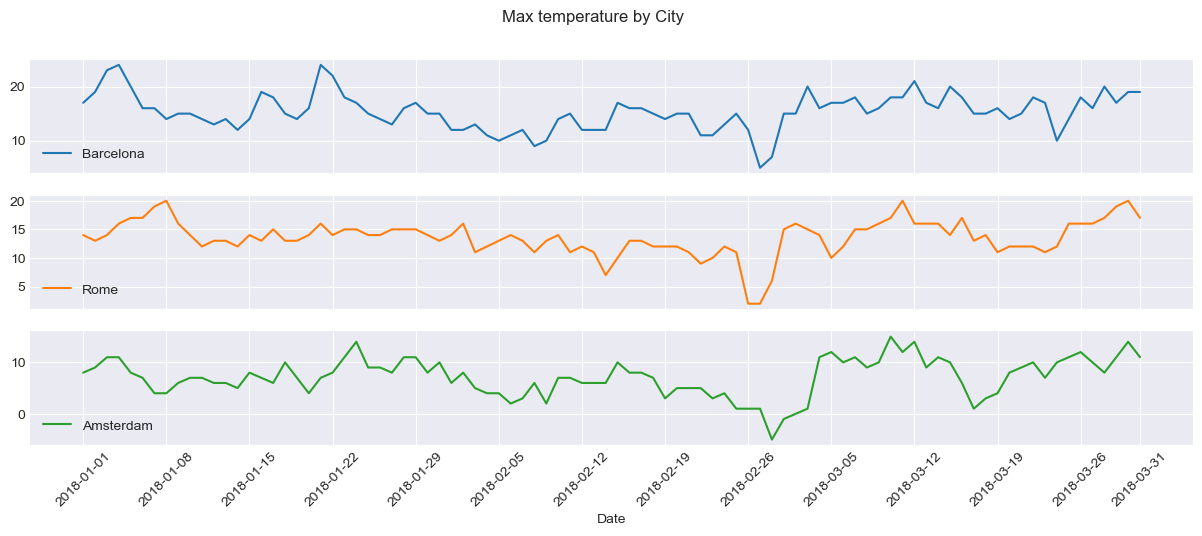

In [50]:
temp_max.plot(figsize=(15,5), 
                subplots=True,
                title='Max temperature by City',
                xticks=datelist,
                rot=45)

<AxesSubplot:title={'center':'Max temperature by City'}, xlabel='Date'>

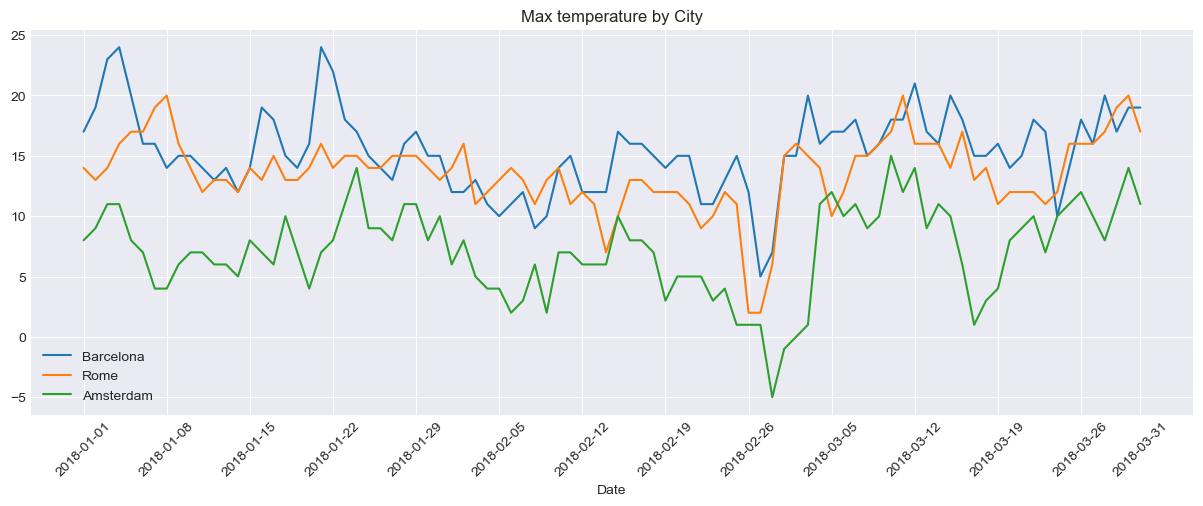

In [51]:
temp_max.plot(figsize=(15,5), 
                title='Max temperature by City',
                xticks=datelist,
                rot=45)

 <br><br>

In [67]:
rom.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City,GoodDay
0,2018-01-01,14,8,0,12,4,Rome,True
1,2018-01-02,13,7,0,12,4,Rome,True
2,2018-01-03,14,1,0,12,4,Rome,True
3,2018-01-04,16,6,0,12,4,Rome,True
4,2018-01-05,17,7,0,12,3,Rome,True


In [64]:
rom["GoodDay"] = rom["TempMax"] > rom["AvgTempMax"]

In [68]:
bar["GoodDay"] = bar["TempMax"] > bar["AvgTempMax"]

In [69]:
ams["GoodDay"] = ams["TempMax"] > ams["AvgTempMax"]

In [121]:
bar.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City,GoodDay
0,2018-01-01,17,11,0,13,7,Barcelona,PLUS
1,2018-01-02,19,8,0,13,7,Barcelona,PLUS
2,2018-01-03,23,11,0,13,7,Barcelona,PLUS
3,2018-01-04,24,15,0,13,7,Barcelona,PLUS
4,2018-01-05,20,10,0,13,7,Barcelona,PLUS


In [118]:
ams.head()

,Date,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,City
0,2018-01-01,8,6,1,4,1,Amsterdam
1,2018-01-02,9,4,5,4,1,Amsterdam
2,2018-01-03,11,6,8,4,1,Amsterdam
3,2018-01-04,11,7,1,4,1,Amsterdam
4,2018-01-05,8,5,3,4,1,Amsterdam


In [119]:
def GoodDay(row):
    if row['TempMax'] >= row['AvgTempMax']:
        return 'PLUS'
    else:
        return 'MINUS'

In [120]:
rom['GoodDay'] = rom.apply(GoodDay, axis=1)
ams['GoodDay'] = ams.apply(GoodDay, axis=1)
bar['GoodDay'] = bar.apply(GoodDay, axis=1)

In [123]:
rom["GoodDay"].value_counts()

PLUS     70
MINUS    20
Name: GoodDay, dtype: int64

In [124]:
bar["GoodDay"].value_counts()

PLUS     64
MINUS    26
Name: GoodDay, dtype: int64

In [125]:
ams["GoodDay"].value_counts()

PLUS     68
MINUS    22
Name: GoodDay, dtype: int64

In [127]:
GoodDay = pd.DataFrame(index=["Plus", "Minus"])

In [136]:
GoodDay["Rome"] = (70, 20)

In [138]:
GoodDay["Barcelona"] = (64, 26)

In [139]:
GoodDay["Amsterdam"] = (68, 22)

In [140]:
GoodDay


,Rome,Barcelona,Amsterdam
Plus,70,64,68
Minus,20,26,22


array([<AxesSubplot:ylabel='Rome'>, <AxesSubplot:ylabel='Barcelona'>,
       <AxesSubplot:ylabel='Amsterdam'>], dtype=object)

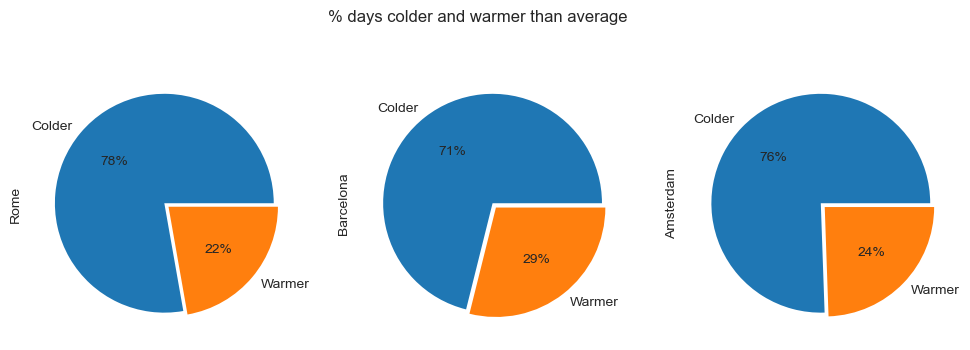

In [166]:
GoodDay.plot(kind='pie',
            title = "% days colder and warmer than average",
            legend = False,
            
            figsize=(12,4),
            subplots = True,
            labels=['Colder', 'Warmer'], 
            autopct='%.0f%%', 
            fontsize = 10,
            explode=(0, 0.05))